In [1]:
"""
created on Mar 18 2019

@author: Huan Zheng
"""
# MNIST

'\ncreated on Mar 18 2019\n\n@author: Huan Zheng\n'

# MNIST数据集

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

输入数据：
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据 shape:
 (55000, 784)
Populating the interactive namespace from numpy and matplotlib


F:\Anaconda\Anaconda3.5\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


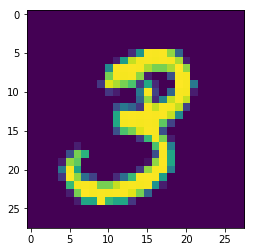

In [6]:
print('输入数据：\n', mnist.train.images)
print('输入数据 shape:\n', mnist.train.images.shape)
import pylab
%pylab inline
im = mnist.train.images[1]
im = im.reshape(-1, 28)
pylab.imshow(im)
pylab.show()

# MNIST分类

In [7]:
import tensorflow as tf

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [21]:
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [22]:
pred = tf.nn.softmax(tf.matmul(x, W) + b)

In [23]:
# 损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# 定义参数
learning_rate = 0.01
# 优化器使用
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [35]:
training_epochs = 25
batch_size = 200
display_step = 5

# 启动Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # 计算平均loss值
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch + 1) % display_step == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
    print('Finished!')
    correct_pre = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pre, tf.float32))
    print('accuracy:', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    # 保存模型
    saver = tf.train.Saver()
    model_path = 'log/521model.ckpt'
    save_path = saver.save(sess, model_path)
    print('Model saved in file: %s' % save_path)

Epoch: 0005 cost =  3.331505386
Epoch: 0010 cost =  2.010511510
Epoch: 0015 cost =  1.561245399
Epoch: 0020 cost =  1.317753056
Epoch: 0025 cost =  1.197257210
Finished!
accuracy: 0.7787
Model saved in file: log/521model.ckpt


Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/521model.ckpt
accuracy: 0.7787
[2 6] [[1.1266060e-05 1.1118904e-10 9.8122609e-01 2.3601364e-12 8.7849676e-06
  1.3464027e-12 1.8718341e-02 1.3616929e-14 3.5514000e-05 3.6794003e-09]
 [1.2652738e-13 9.7039980e-19 1.1021366e-06 1.1679749e-17 1.1086344e-08
  1.0423539e-12 9.9999893e-01 2.1630617e-16 2.6088596e-14 1.2687436e-10]] [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


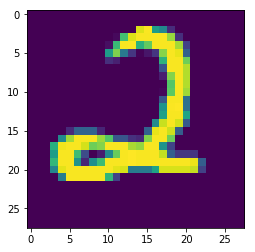

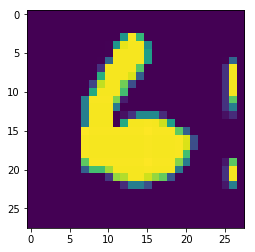

In [39]:
print('Starting 2nd session...')
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 恢复模型变量
    saver.restore(sess, model_path)
    
    # 测试mdoel
    corre_prediction = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy = tf.reduce_mean(tf.cast(correct_pre, tf.float32))
    print('accuracy:', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval, predv = sess.run([output, pred], feed_dict={x: batch_xs})
    print(outputval, predv, batch_ys)
    
    im = batch_xs[0]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()